In [2]:
import pandas as pd

In [3]:
candidates = pd.read_csv("watson_shap_values_for_testset.csv")

In [4]:
candidates.head()

,EmployeeID,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,ShiftSchedule,State,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,10011,-0.082934,-0.049007,0.033110,-0.052101,-0.094783,-0.007782,-0.056123,0,-0.106410,...,0.109181,-0.195666,0.056648,0.011107,-0.017621,-0.000377,-0.032997,0.003732,-0.042552,-0.120689
1,10012,-0.061724,-0.185156,0.004095,-0.055188,-0.063846,-0.032673,-0.057622,0,-0.025947,...,-0.035909,-0.169545,0.043217,0.079458,-0.052512,-0.043295,0.060303,0.016709,-0.037952,0.152560
2,10013,0.006087,-0.057510,0.017782,-0.002091,-0.008152,-0.028928,-0.070993,0,-0.042936,...,-0.038788,-0.169869,0.099417,-0.009016,-0.046488,-0.080971,-0.022697,0.007191,-0.037359,-0.110958
3,10014,-0.012834,0.242323,-0.044950,-0.039829,-0.133996,-0.034905,-0.051805,0,-0.053241,...,-0.024949,0.165522,0.033103,-0.006922,-0.044399,-0.036111,-0.074827,-0.025470,0.004950,-0.036003
4,10015,-0.035391,-0.023601,0.014274,0.015462,-0.138073,0.007920,0.052945,0,-0.072430,...,-0.022945,0.126107,0.101879,-0.028295,-0.055819,-0.049084,-0.013705,0.011744,-0.039383,-0.054550


In [5]:
candidates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeID                206 non-null    int64  
 1   Age                       206 non-null    float64
 2   BusinessTravel            206 non-null    float64
 3   DailyRate                 206 non-null    float64
 4   Department                206 non-null    float64
 5   DistanceFromHome          206 non-null    float64
 6   Education                 206 non-null    float64
 7   EducationField            206 non-null    float64
 8   EmployeeNumber            206 non-null    int64  
 9   EnvironmentSatisfaction   206 non-null    float64
 10  Gender                    206 non-null    float64
 11  HourlyRate                206 non-null    float64
 12  JobInvolvement            206 non-null    float64
 13  JobLevel                  206 non-null    float64
 14  JobRole   

In [14]:
candidates['YearsSinceLastPromotion'].value_counts()

-0.042552    1
-0.044223    1
-0.046691    1
-0.044207    1
 0.131811    1
            ..
-0.041490    1
 0.126424    1
-0.013535    1
-0.041508    1
-0.011973    1
Name: YearsSinceLastPromotion, Length: 206, dtype: int64

In [7]:
candidates.describe()

,EmployeeID,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,ShiftSchedule,State,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.0,206.000000,...,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000
mean,10113.500000,-0.011018,0.003252,-0.005466,-0.007178,-0.012568,-0.006186,-0.008037,0.0,-0.008946,...,-0.006681,-0.037639,-0.001089,-0.009849,-0.015283,-0.021672,-0.011789,-0.005465,0.002189,-0.018384
std,59.611241,0.117851,0.149488,0.056474,0.056754,0.096472,0.023288,0.064892,0.0,0.072979,...,0.058100,0.157580,0.047396,0.032437,0.037998,0.083194,0.043301,0.021177,0.077155,0.110680
min,10011.000000,-0.168448,-0.189760,-0.126423,-0.091577,-0.145486,-0.042545,-0.114426,0.0,-0.123703,...,-0.064023,-0.222816,-0.110744,-0.052166,-0.100759,-0.111785,-0.078506,-0.053889,-0.070969,-0.160302
25%,10062.250000,-0.101604,-0.067887,-0.050987,-0.053574,-0.088126,-0.023870,-0.057170,0.0,-0.055157,...,-0.038342,-0.163725,-0.033674,-0.030817,-0.040916,-0.067850,-0.038962,-0.020424,-0.047233,-0.092211
50%,10113.500000,-0.045281,-0.050721,0.004892,-0.014650,-0.047923,-0.011114,-0.019498,0.0,-0.024889,...,-0.027921,-0.131375,-0.012737,-0.018226,-0.019587,-0.043785,-0.023426,-0.002549,-0.030381,-0.054852
75%,10164.750000,0.061404,-0.029803,0.033317,0.018848,0.075757,0.005467,0.015892,0.0,0.014378,...,-0.015579,0.130303,0.038035,-0.001871,0.006782,-0.005493,-0.000886,0.011076,0.019396,0.005201
max,10216.000000,0.339463,0.401332,0.128684,0.171293,0.228742,0.074315,0.172386,0.0,0.301851,...,0.152416,0.265503,0.132647,0.114343,0.115997,0.374746,0.133825,0.041426,0.231570,0.393495


In [8]:
%matplotlib inline

array([[<AxesSubplot: title={'center': 'EmployeeID'}>,
        <AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'BusinessTravel'}>,
        <AxesSubplot: title={'center': 'DailyRate'}>,
        <AxesSubplot: title={'center': 'Department'}>,
        <AxesSubplot: title={'center': 'DistanceFromHome'}>],
       [<AxesSubplot: title={'center': 'Education'}>,
        <AxesSubplot: title={'center': 'EducationField'}>,
        <AxesSubplot: title={'center': 'EmployeeNumber'}>,
        <AxesSubplot: title={'center': 'EnvironmentSatisfaction'}>,
        <AxesSubplot: title={'center': 'Gender'}>,
        <AxesSubplot: title={'center': 'HourlyRate'}>],
       [<AxesSubplot: title={'center': 'JobInvolvement'}>,
        <AxesSubplot: title={'center': 'JobLevel'}>,
        <AxesSubplot: title={'center': 'JobRole'}>,
        <AxesSubplot: title={'center': 'JobSatisfaction'}>,
        <AxesSubplot: title={'center': 'MaritalStatus'}>,
        <AxesSubplot: title={'center':

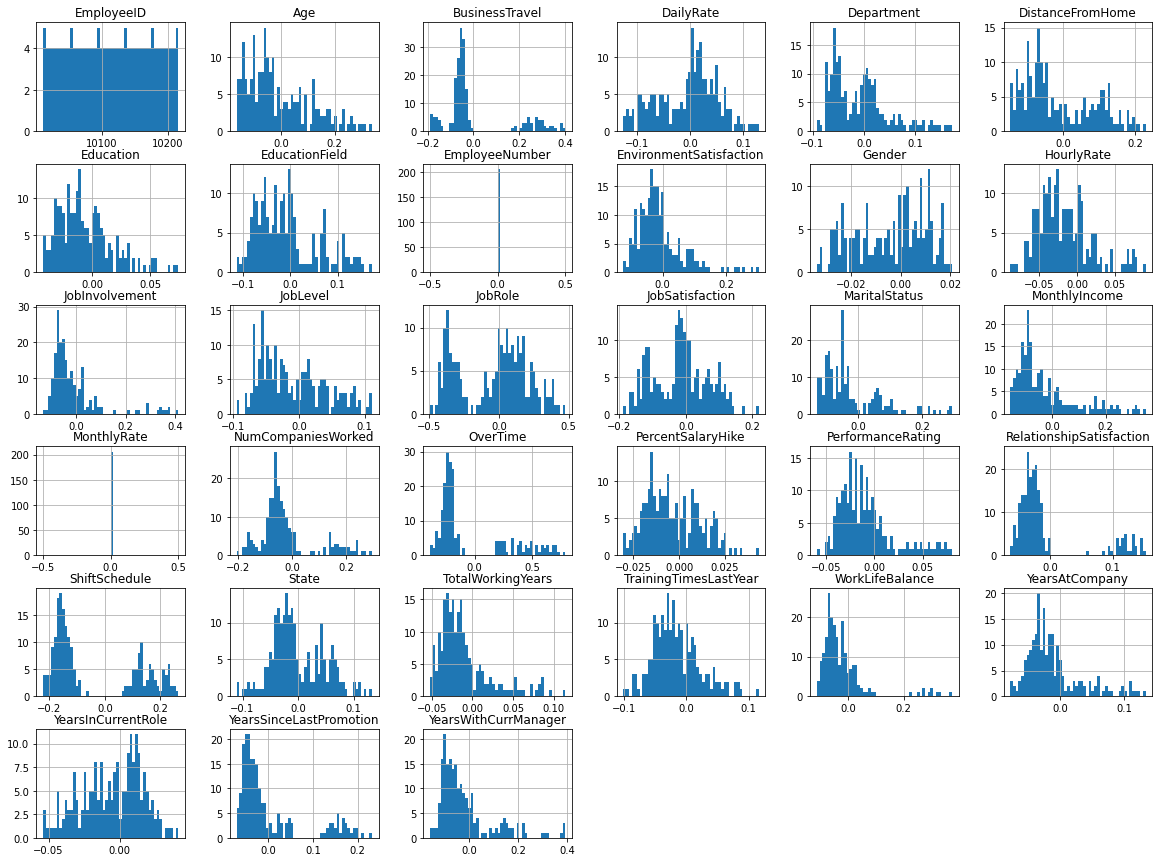

In [9]:
candidates.hist(bins=50, figsize=(20,15))

In [10]:
import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size=int(len(data)*test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(candidates, test_size =0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 164
Rows in test set: 42



In [12]:
# strat_test_set['EducationField'].value_counts()

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=42)
for train_index, test_index in split.split(candidates, candidates['BusinessTravel']):
    strat_train_set = candidates.loc[train_index]
    strat_test_set = candidates.loc[test_index]

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.